In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_excel('week3ex2data1.xlsx')
x=df[['A','B']]
y=df['C']

In [2]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.2, random_state=42)
train_x= train_x.T
train_y=train_y.T
test_x=test_x.T
test_y=test_y.T

In [3]:
def sigmoid(thtx):
    return 1/(1+ np.exp(-thtx))
def initialize_weigths_and_bias(dimension):
    w = np.full((dimension,1), 0.01)
    b = float(1)
    return w,b

def loss(train_y,y_head):
    train_yy=pd.DataFrame(train_y)
    one=np.ones(train_x.shape[1])
    onee=np.ones((80,1))
    loss= -train_yy* np.log(y_head).T-(onee-train_yy)*np.log(one-y_head).T
    return loss

In [4]:
alpha=0.001
epoch =5000

train_yyy=pd.DataFrame(train_y)
w,b = initialize_weigths_and_bias(2)
cost_list=[]

for i in range(epoch):
    g_para=np.dot(w.T,train_x)
    g_para = np.array(g_para)
    #print(type(b))
    g_para += b
    h_theta=sigmoid(g_para)
    los=loss(train_y,h_theta)
    cost=np.sum(los)/train_x.shape[1]
    cost_list.append(cost)
    dweight=(np.dot(train_x,h_theta.T-train_yyy))/train_x.shape[1]
    dbias= (float)(np.sum(h_theta.T-train_yyy)/train_x.shape[1])
    w=w-alpha*dweight
    b=b-alpha*dbias
    #print("Epoch:", i, "Loss:", cost)

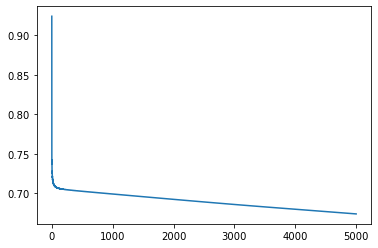

In [5]:
xx=np.linspace(1,epoch, epoch)
plt.plot(xx,cost_list)

In [6]:

y_prediction = np.zeros((1,test_x.shape[1]))
gpara=np.dot(w.T,test_x)
htheta=sigmoid(gpara)

for i in range(htheta.shape[1]):
    if htheta[0,i]<= 0.5:
        y_prediction[0,i] = 0
    else:
        y_prediction[0,i] = 1


In [7]:
tp=0
fp=0
fn=0
tn=0
for i in range(test_x.shape[1]):
    if(y_prediction[0,i]==0 and test_y.iloc[i]==0):
        tn=tn+1
    if(y_prediction[0,i]==0 and test_y.iloc[i]==1):
        fn=fn+1
    if(y_prediction[0,i]==1 and test_y.iloc[i]==0):
        fp=fp+1
    if(y_prediction[0,i]==1 and test_y.iloc[i]==1):
        tp=tp+1
tn,fn,fp,tp
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1score=(2*precision*recall)/(precision+recall)
f1score

0.7407407407407408

In [8]:
# def sigmoid(thtx):
#     return 1/(1+ np.exp(-thtx))
# def initialize_weigths_and_bias(dimension):
#     w = np.full((dimension,1), 0.01)
#     b = float(1)
#     return w,b

# def loss(train_y,y_head):
#     train_yy=pd.DataFrame(train_y)
#     one=np.ones(train_x.shape[1])
#     onee=np.ones((80,1))
#     loss= -train_yy* np.log(y_head).T-(onee-train_yy)*np.log(one-y_head).T
#     return loss
# ans=0
# for i in range(10):
#     x=df[['A','B']]
#     y=df['C']
#     from sklearn.model_selection import train_test_split
#     c=np.random.randint(1,100)
#     train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.2, random_state=c)
#     train_x= train_x.T
#     train_y=train_y.T
#     test_x=test_x.T
#     test_y=test_y.T
#     alpha=0.001
#     epoch = 10000

#     train_yyy=pd.DataFrame(train_y)
#     w,b = initialize_weigths_and_bias(2)
#     cost_list=[]

#     for i in range(epoch):
#         g_para=np.dot(w.T,train_x)
#         g_para = np.array(g_para)
#         #print(type(b))
#         g_para += b
#         h_theta=sigmoid(g_para)
#         los=loss(train_y,h_theta)
#         cost=np.sum(los)/train_x.shape[1]
#         cost_list.append(cost)
#         dweight=(np.dot(train_x,h_theta.T-train_yyy))/train_x.shape[1]
#         dbias= (float)(np.sum(h_theta.T-train_yyy)/train_x.shape[1])
#         w=w-alpha*dweight
#         b=b-alpha*dbias
#         #print("Epoch:", i, "Loss:", cost)
#     y_prediction = np.zeros((1,test_x.shape[1]))
#     gpara=np.dot(w.T,test_x)
#     htheta=sigmoid(gpara)

#     for i in range(py_head.shape[1]):
#         if py_head[0,i]<= 0.5:
#             y_prediction[0,i] = 0
#         else:
#             y_prediction[0,i] = 1
#     tp=0
#     fp=0
#     fn=0
#     tn=0
#     for i in range(test_x.shape[1]):
#         if(y_prediction[0,i]==0 and test_y.iloc[i]==0):
#             tn=tn+1
#         if(y_prediction[0,i]==0 and test_y.iloc[i]==1):
#             fn=fn+1
#         if(y_prediction[0,i]==1 and test_y.iloc[i]==0):
#             fp=fp+1
#         if(y_prediction[0,i]==1 and test_y.iloc[i]==1):
#             tp=tp+1
#     tn,fn,fp,tp
#     precision=tp/(tp+fp)
#     recall=tp/(tp+fn)
#     f1score=(2*precision*recall)/(precision+recall)
    
#     ans=ans+f1score
# ans/10   